In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statistics
import warnings
warnings.filterwarnings("ignore")

In [91]:
df = pd.read_csv('heart.csv')
df.head()
df.fillna(0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [92]:
df['Sex'].replace( { 'M':1, 'F':0} , inplace=True)
df['ChestPainType'].replace( { 'ATA':1, 'NAP':2, 'ASY':3, 'TA':4} , inplace=True)
df['FastingBS'].replace( { 0 : 0, 1 : 1} , inplace=True)
df['RestingECG'].replace( { 'Normal':0, 'ST':1, 'LVH':2} , inplace=True)
df['ExerciseAngina'].replace( { 'N':0, 'Y':1} , inplace=True)
df['ST_Slope'].replace( { 'Up':0, 'Flat':1, 'Down':2} , inplace=True)
df['HeartDisease'].replace( { 1 : 1, 0 : 0} , inplace=True)

In [93]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,0,132,0,1.2,1,1
914,68,1,3,144,193,1,0,141,0,3.4,1,1
915,57,1,3,130,131,0,0,115,1,1.2,1,1
916,57,0,1,130,236,0,2,174,0,0.0,1,1


In [94]:
y =df.HeartDisease.values
x1=df.drop(["HeartDisease"],axis=1)
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values
print(x)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    0.244898  1.0       0.000000       0.70     0.479270        0.0   
1    0.428571  0.0       0.333333       0.80     0.298507        0.0   
2    0.183673  1.0       0.000000       0.65     0.469320        0.0   
3    0.408163  0.0       0.666667       0.69     0.354892        0.0   
4    0.530612  1.0       0.333333       0.75     0.323383        0.0   
..        ...  ...            ...        ...          ...        ...   
913  0.346939  1.0       1.000000       0.55     0.437811        0.0   
914  0.816327  1.0       0.666667       0.72     0.320066        1.0   
915  0.591837  1.0       0.666667       0.65     0.217247        0.0   
916  0.591837  0.0       0.000000       0.65     0.391376        0.0   
917  0.204082  1.0       0.333333       0.69     0.290216        0.0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0           0.0  0.788732             0.0  0.295455       0.0  
1      

In [95]:
def weights_bias(dimension):
    w = np.full((dimension,1),.01)
    b = 0.0
    return w,b
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [96]:
def forward_and_backward_propogation(w,b,xtrain,ytrain):
   
    z = np.dot(w.T,xtrain) +  b 
    y_head = sigmoid(z)
    loss = -ytrain*np.log(y_head)-(1-ytrain)*(np.log(1-y_head))
    cost = (np.sum(loss))/xtrain.shape[1]
    #backward p.
    derivative_weight = (np.dot(xtrain,((y_head-ytrain).T)))/xtrain.shape[1] 
    derivetive_bias = np.sum(y_head-ytrain)/xtrain.shape[1]
    gradients = {"weight": derivative_weight,"bias": derivetive_bias}
    
    return cost,gradients

In [97]:

def update(w,b,xtrain, ytrain, learning_rate, iteration):
    costlist = []
    costlist2 = []
    index = []
    
    for i in range(iteration):
       
        cost,gradients = forward_and_backward_propogation(w,b,xtrain,ytrain)
        costlist.append(cost)
        w = w - learning_rate*gradients["weight"]
        b = b - learning_rate*gradients["bias"]
        if i % 10 == 0:
            costlist2.append(cost)
            index.append(i)
            
            
    
    parameters = {"weight": w, "bias":b}
  
    return parameters, gradients, costlist,costlist2,index

In [98]:
def predict(w,b,xtest):
    
    z =sigmoid(np.dot(w.T,xtest)+b)
    yprediction = np.zeros((1,xtest.shape[1]))
   
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            yprediction[0,i] = 0
        else:
            yprediction[0,i] = 1
    return yprediction

In [99]:
def tp_tn_fn_fp(y_act, y_pred):

    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    return tp, tn, fp, fn

def precision_fn(tp, fp):
   
    return (tp  * 100)/ float( tp + fp)

def recall_fn(tp, fn):
    
    return (tp  * 100)/ float( tp + fn)

def f1_score_fn(precision, recall):
    # calculates the F1 score
    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score

In [100]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sebrn
def LogReg(xtrain,ytrain,xtest,ytest,learning_rate,number_of_iteration):
    dimension = xtrain.shape[0] 
    w,b=weights_bias(dimension)
    parameters,gradients,costlist,costlist2,index = update(w,b,xtrain,ytrain,learning_rate,number_of_iteration)
    y_prediciton_test = predict(parameters["weight"],parameters["bias"],xtest)
    ytest1=ytest.flatten()
    y_prediciton_test1=y_prediciton_test.flatten()
    
    tp, tn, fp, fn= tp_tn_fn_fp(ytest1,y_prediciton_test1)
    precision=precision_fn(tp, fp)
    recall= recall_fn(tp, fn)
    f1_score=f1_score_fn(precision,recall)
    accuracy=format(100-np.mean(np.abs(y_prediciton_test-ytest))*100)
    conf_matrix = confusion_matrix(ytest1, y_prediciton_test1)
    return accuracy,costlist2,index,precision,recall,f1_score,conf_matrix

In [101]:
def plot(index,costlist):
    plt.plot(index,costlist)
    #plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()

def plot_confusion_matrix(cm):
    fx = sebrn.heatmap(cm, annot=True, cmap='turbo')
    fx.set_title(' Confusion Matrix \n\n');
    fx.set_xlabel('\nValues model predicted')
    fx.set_ylabel('True Values ');
    

Test Accuracy: 82.6086956521739
Precision 87.12871287128714
Recall:  82.24299065420561
f1-score:  84.61538461538461


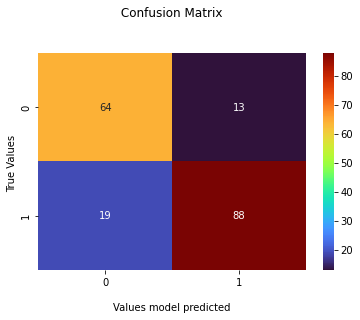

In [102]:
ac,cost,index,precision,recall,f1,conf_matrix=LogReg(xtrain,ytrain,xtest,ytest,learning_rate=0.1,number_of_iteration =5000)
print("Test Accuracy:", ac)
print("Precision", precision)
print("Recall: ", recall)
print("f1-score: ", f1)
plot_confusion_matrix(conf_matrix)
#plot(index,cost)

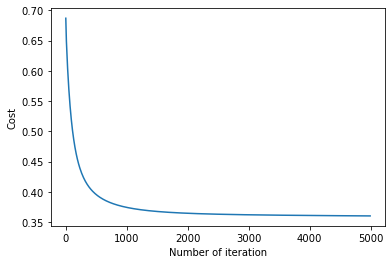

In [103]:
plot(index,cost)

Test Accuracy: 81.52173913043478
Precision 86.13861386138613
Recall:  81.30841121495327
f1-score:  83.65384615384615


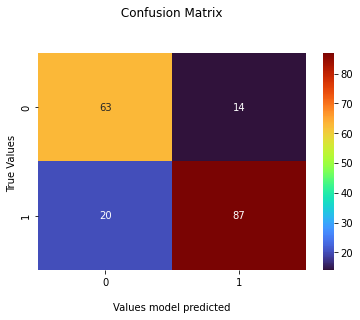

In [104]:
ac,cost,index,precision,recall,f1,conf_matrix=LogReg(xtrain,ytrain,xtest,ytest,learning_rate=0.01,number_of_iteration =9000)
print("Test Accuracy:", ac)
print("Precision", precision)
print("Recall: ", recall)
print("f1-score: ", f1)
plot_confusion_matrix(conf_matrix)

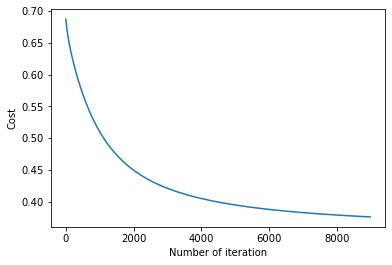

In [105]:
plot(index,cost)

In [106]:
from random import randint,randrange
def cross_validation(df,folds):
    l=df.values.tolist()
    #print(l[607])
    #print(l)
    fold_size=len(l)//folds
    split_dataset=[]
    for i in range(folds):
        temp=[]
        x=0
        while x<fold_size:
            index=randrange(len(l))
            row=l.pop(index)
            temp.append(row)
            x+=1
        split_dataset.append(temp)
    return split_dataset
            


In [107]:
import array
def normalize(inp_data):
    inp_df = (inp_data - inp_data.min()) / (inp_data.max()-inp_data.min())
    return inp_df
def validationscore(split_dataset,learning_rate,number_of_iteration):
    
    p=[]
    r=[]
    f=[]
    t=[]
    #t1 = np.empty(50, dtype=object) 
    print("Logistic regression: ")
    for i in range(len(split_dataset)):
        testdf=split_dataset[i]
        traindf=[]
        for j in range(len(split_dataset)):
            if i!=j:
                traindf.append(split_dataset[j])
        temp=[]
        for k in traindf:
            for a in k:
                temp.append(a)
    
    
        traintemporary=pd.DataFrame(temp)
        traintemporary.columns=["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope","HeartDisease"]
        traindf=traintemporary
        testtemporary=pd.DataFrame(testdf)
        testtemporary.columns=["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope","HeartDisease"]
        testdf=traintemporary   
    
        
        ytrain = traindf["HeartDisease"]
        ytrain= ytrain.T
        ytrain=ytrain.to_numpy()
        xtrain = traindf[["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope"]]
        ytest = testdf["HeartDisease"]
        ytest= ytest.T
        ytest=ytest.to_numpy()
        
        xtest = testdf[["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope"]]
        xtrain_norm = xtrain.astype('int')
        xtrain_norm = normalize(xtrain_norm)
        xtrain_norm =(xtrain_norm.T)

        ytrain_norm = ytrain.astype('int')
        xtest_norm = xtest.astype('int')
        xtest_norm = normalize(xtest_norm)
        xtest_norm=xtest_norm.T
        ytest_norm = ytest.astype('int')
       
        accuracy,costlist2,index,precision,recall,f1,conf_matrix=LogReg(xtrain_norm,ytrain_norm,xtest_norm,ytest_norm,learning_rate,number_of_iteration)
        t.append(float(accuracy))
        p.append(precision)
        r.append(recall)
        f.append(f1)
        #print("accurac,",t1)
        #score=score.append(accuracy)
        #print("accuracy for fold",i,"is",accuracy)
    return t,p,r,f
k=7
split_dataset=cross_validation(df,k)
scoreset,precision,recall,f1=validationscore(split_dataset,learning_rate=.1,number_of_iteration=1000)
print("for",k," fold test score set")
print(scoreset)
#u=np.mean(scoreset[scoreset != None])
u=np.mean(scoreset)
precision=np.mean(precision)
recall=np.mean(recall)
f1=np.mean(f1)
print("Test Accuracy:",u)
print("Precision:",precision)
print("Recall: ",recall)
print("f1-Score: ",f1)

Logistic regression: 
for 7  fold test score set
[84.60559796437659, 84.86005089058524, 84.86005089058524, 84.60559796437659, 84.47837150127226, 85.75063613231552, 84.73282442748092]
Test Accuracy: 84.84187568157033
Precision: 85.58647039614252
Recall:  87.27410412780644
f1-Score:  86.42170991569716


In [108]:
k=10
split_dataset=cross_validation(df,k)
scoreset,precision,recall,f1=validationscore(split_dataset,learning_rate=.01,number_of_iteration=10000)
print("for",k," fold test score set")
print(scoreset)
u=np.mean(scoreset)
precision=np.mean(precision)
recall=np.mean(recall)
f1=np.mean(f1)
print("Test Accuracy:",u)
print("Precision:",precision)
print("Recall: ",recall)
print("f1-Score: ",f1)

Logistic regression: 
for 10  fold test score set
[85.59218559218559, 84.98168498168498, 84.49328449328449, 84.98168498168498, 85.83638583638583, 84.73748473748473, 84.73748473748473, 84.61538461538461, 84.24908424908425, 85.34798534798534]
Test Accuracy: 84.95726495726494
Precision: 85.72357383819077
Recall:  87.38412720827276
f1-Score:  86.54525243987256


In [109]:
k=5
split_dataset=cross_validation(df,k)
scoreset,precision,recall,f1=validationscore(split_dataset,learning_rate=.001,number_of_iteration=250000)
print("for",k," fold test score set")
print(scoreset)
u=np.mean(scoreset)
precision=np.mean(precision)
recall=np.mean(recall)
f1=np.mean(f1)
print("Test Accuracy:",u)
print("Precision:",precision)
print("Recall: ",recall)
print("f1-Score: ",f1)

Logistic regression: 
for 5  fold test score set
[85.79234972677595, 85.10928961748634, 86.20218579234972, 85.92896174863388, 85.79234972677595]
Test Accuracy: 85.76502732240438
Precision: 85.97354271686768
Recall:  88.73251324281142
f1-Score:  87.32973996192807
